Following this video: https://www.youtube.com/watch?v=29ZQ3TDGgRQ

###Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


##Data Prep

###Data Separation

In [ ]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
x = df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


###Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

##Model Building

###Linear Regression

####**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

####**Applying the model to make prediction**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

####**Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [ ]:
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Train):',lr_train_r2)
print('LR MSE (Test):',lr_test_mse)
print('LR R2 (Test):',lr_test_r2)

LR MSE (Train): 1.0075362951093687
LR R2 (Train): 0.7645051774663391
LR MSE (Test): 1.0206953660861033
LR R2 (Test): 0.7891616188563282


In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Testing MSE','Testing R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


###  **Random Forest**

####**Training the Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

####**Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

####**Evaluate Model Performance**

In [ ]:
rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Testing MSE','Testing R2']

In [ ]:
rf_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


###**Model Comparison**

In [ ]:
lr_rf_results = pd.concat([lr_results,rf_results],axis=0)
lr_rf_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [ ]:
lr_rf_results.reset_index(drop=True, inplace=True)
lr_rf_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


###**Data Visualization of Results**

Text(0.5, 0, 'Experimental LogS')

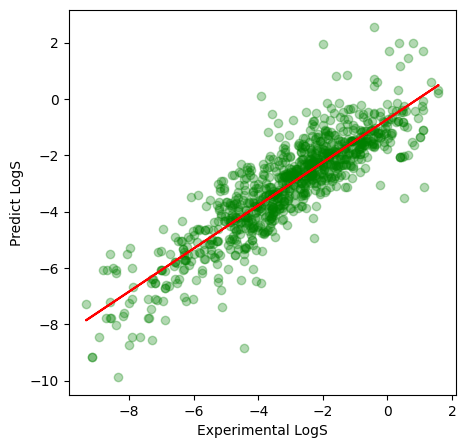

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
plt.scatter(x = y_train, y = y_lr_train_pred,c='green', alpha = 0.3)

z = np.polyfit(y_train,y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'red')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')